# Import Libraries 

In [1]:
import ssl

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import numpy as np
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import models as cifar_models

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

exp_data = datasets.CIFAR10('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
]))

# dataloader
train_loader = torch.utils.data.DataLoader(exp_data, batch_size=10, shuffle=True, num_workers=2)

Files already downloaded and verified


In [3]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/exploratory_analysis')

# Know Thy Data

In [4]:
print(exp_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## Look at the images

In [5]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# write to tensorboard
writer.add_image('ten_cifar10_images', img_grid)

print(labels)

model = cifar_models.NetBN()
writer.add_graph(model, images)
writer.close()

tensor([7, 7, 7, 6, 2, 8, 3, 6, 0, 9])


## Dimensions

In [6]:
exp_data_np = exp_data.data
print(' - Size:', exp_data_np.size)
print(' - Shape:', exp_data_np.shape)

 - Size: 153600000
 - Shape: (50000, 32, 32, 3)


In [7]:
# Concatenate all images to form a single tensor
all_images = [image for image, _ in exp_data]
all_images = torch.stack(all_images, dim=0).numpy()

[all_images] Shape: (50000, 3, 32, 32)
[all_images[0][0]] Shape: (32, 32)


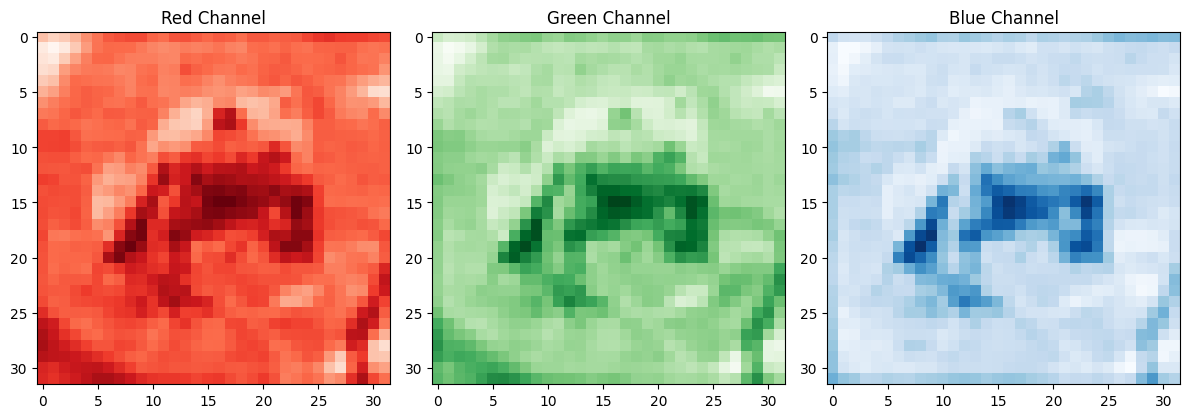

In [8]:
print('[all_images] Shape:', all_images.shape)
print('[all_images[0][0]] Shape:', all_images[0][0].shape)

# Plot the first image
# Plot each channel horizontally
plt.figure(figsize=(12, 4))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(all_images[0][0], cmap='Reds')
plt.title('Red Channel')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(all_images[0][1], cmap='Greens')
plt.title('Green Channel')

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(all_images[0][2], cmap='Blues')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

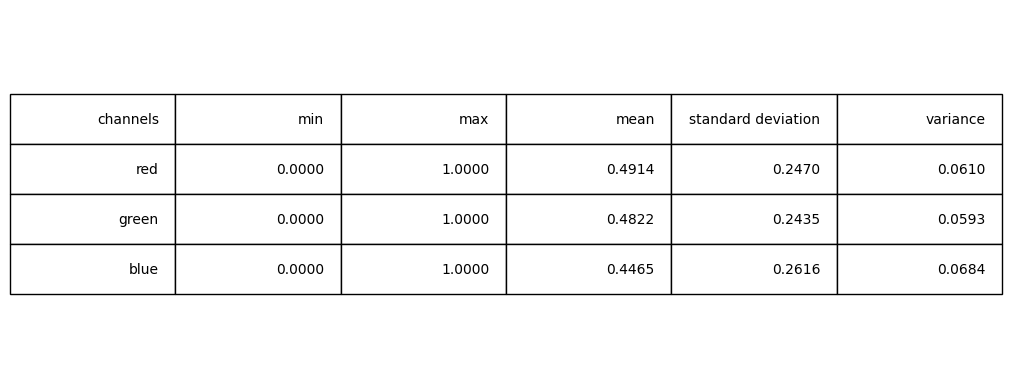

In [9]:
# Red
red_channel = all_images[:,0,:,:]
min_r, max_r, mean_r, std_r, var_r = red_channel.min(), red_channel.max(), red_channel.mean(), red_channel.std(), red_channel.var()

# Green
green_channel = all_images[:,1,:,:]
min_g, max_g, mean_g, std_g, var_g = green_channel.min(), green_channel.max(), green_channel.mean(), green_channel.std(), green_channel.var()

# Blue
blue_channel = all_images[:,2,:,:]
min_b, max_b, mean_b, std_b, var_b = blue_channel.min(), blue_channel.max(), blue_channel.mean(), blue_channel.std(), blue_channel.var()

channels = ['red', 'green', 'blue']
min_values = [min_r, min_g, min_b]
max_values = [max_r, max_g, max_b]
mean_values = [mean_r, mean_g, mean_b]
std_values = [std_r, std_g, std_b]
var_values = [var_r, var_g, var_b]

# Initialize table data with headers
table_data = [['channels', 'min', 'max', 'mean', 'standard deviation', 'variance']]

for channel, min, max, mean, std, var in zip(channels, min_values, max_values, mean_values, std_values, var_values):
    table_data.append([channel, f'{min:.4f}', f'{max:.4f}', f'{mean:.4f}', f'{std:.4f}', f'{var:.4f}'])

# Create the table
plt.axis('off')  # Hide axes
table = plt.table(cellText=table_data, loc='center')

# Table styling
table.scale(2, 3)  # Adjust table size

plt.show()